# Import Libraries

In [2]:
import numpy as np
import os
import keras
import pandas as pd
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
import matplotlib.colors

import seaborn as sns
import matplotlib.pyplot as plt
from skimage.transform import resize
from sklearn.utils import shuffle 
from tensorflow.keras.utils import to_categorical

### Creating the CNN Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Input, Dense, InputLayer, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.models import Model, Sequential
from tensorflow.keras.models import Sequential, load_model
from keras import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Building Model
from keras.utils import plot_model
from tensorflow.keras import models

# Training Model
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

In [4]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

train_dir = '/kaggle/input/brain-tumor-classification-mri/Training/'
test_dir = '/kaggle/input/brain-tumor-classification-mri/Testing/'

In [5]:
X_train = [] #Training Dataset
Y_train = [] #Training Labels

image_size=224

for label in labels:
    path = os.path.join(train_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
        img_array = plt.imread(os.path.join(path, img))
        img_resized = resize(img_array, (image_size, image_size, 3))
        X_train.append(img_resized)
        Y_train.append(class_num)

for label in labels:
    path = os.path.join(test_dir, label)
    class_num = labels.index(label)
    for img in os.listdir(path):
        img_array = plt.imread(os.path.join(path, img))
        img_resized = resize(img_array, (image_size, image_size, 3))
        X_train.append(img_resized)
        Y_train.append(class_num)
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)

# Data Augmentation

In [6]:
# Data generators
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=90,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   validation_split=0.2)

valid_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

train_generator=train_datagen.flow_from_directory('/kaggle/input/brain-tumor-classification-mri',
                                                  target_size=(224,224), color_mode='rgb', shuffle=True,
                                                  subset='training', batch_size=32, class_mode='categorical')

val_generator = valid_datagen.flow_from_directory('/kaggle/input/brain-tumor-classification-mri',
                                                  target_size=(224,224), color_mode='rgb', shuffle=True,
                                                  subset='validation',batch_size=32,class_mode='categorical')

Found 2612 images belonging to 2 classes.
Found 652 images belonging to 2 classes.


In [7]:
X_train.shape

(3264, 224, 224, 3)

In [8]:
# Shuffling data
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

In [9]:
#After shuffling sample size remains same
X_train.shape

(3264, 224, 224, 3)

**Ploting Some Images**

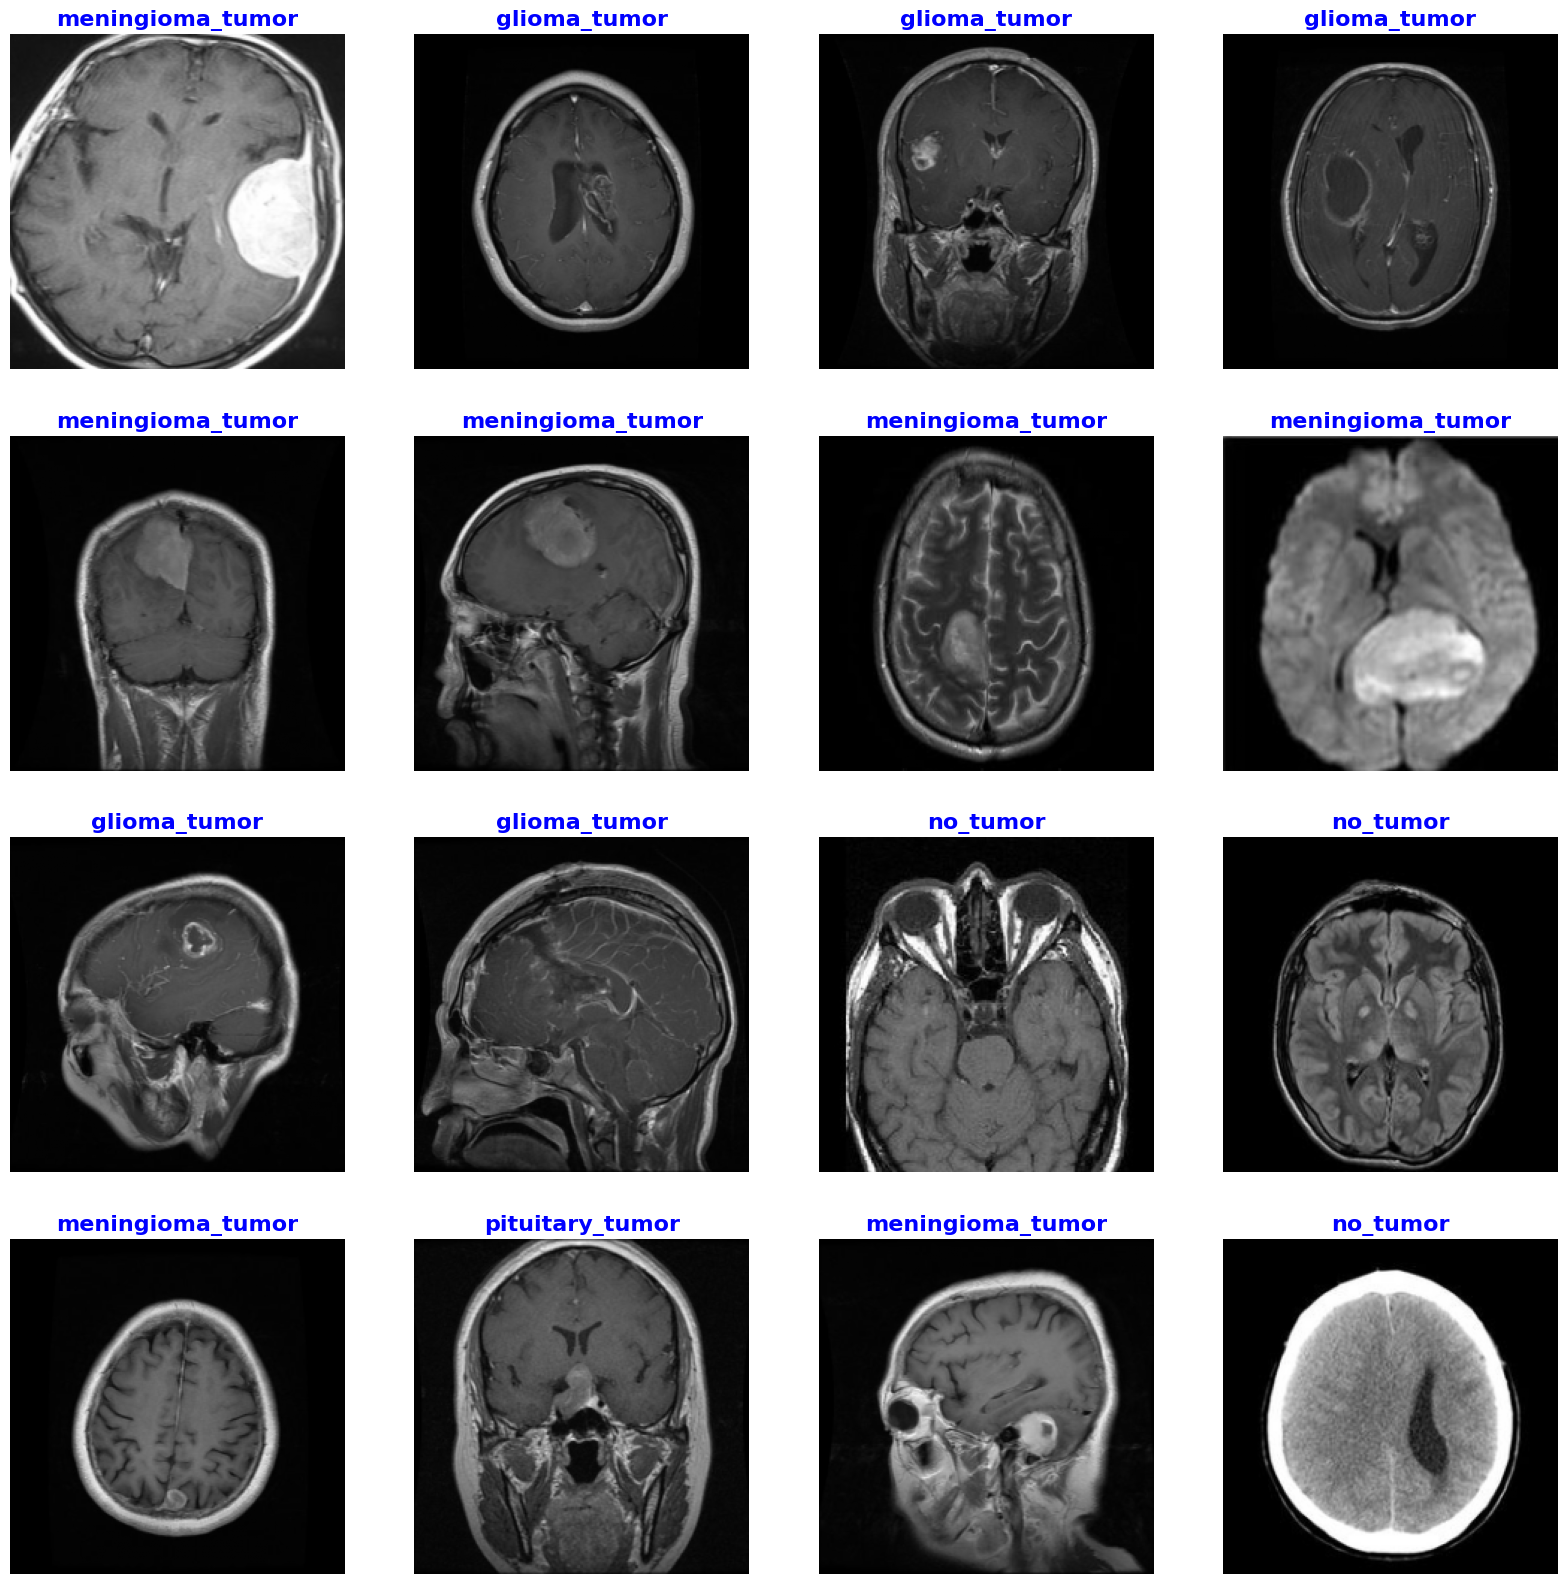

In [10]:
#plotting the images
plt.figure(figsize=(20,20))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i])
    plt.title(labels[Y_train[i]], color = 'blue' , fontsize=16, fontweight='bold')
    plt.axis("off")
plt.show()

# Splitting data into : Train, Test, Valid as 70%, 20%, 10%

In [10]:
# Split the data into training and testing and validation
X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, test_size=0.1, random_state=42)

In [11]:
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(Y_valid.shape)

(2349, 224, 224, 3)
(262, 224, 224, 3)
(653, 224, 224, 3)
(2349,)
(653,)
(262,)


In [13]:
import warnings
# Count the number of images in each class
class_counts = np.bincount(Y_train)
class_names = ['glioma', 'meningioma', 'no tumor', 'pituitary']

# Create a DataFrame with class names and counts
train_df = pd.DataFrame({'Class': class_names, 'Count': class_counts})

# Create a histogram for the train labels using Plotly Express
fig = px.bar(train_df, y='Class', x='Count', color='Class', template='plotly_dark',
             title='\nNumber of Images in Each Class of the Train Data', orientation='h')

# Update hover template to display count and label
fig.update_traces(hovertemplate='Count: %{x}<br>Class: %{y}')

# Update layout with custom styles
fig.update_layout(title_font=dict(color='white'),
                  legend=dict(font=dict(color='white')),
                  paper_bgcolor='black',  # Set black paper background
                  plot_bgcolor='rgba(0, 0, 0, 0)',  # Set transparent plot background
                  font=dict(color='white'),  # Set font color to white
                  title={'font': {'size': 16}},  # Decrease title font size
                  showlegend=False)  # Hide legend

# Set the template style to 'plotly_dark'
fig.update_layout(template='plotly_dark')

# Show the plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


In [14]:
# Count the number of images in each class
class_counts = np.bincount(Y_test)
class_names = ['glioma', 'meningioma', 'no tumor', 'pituitary']

# Create a DataFrame with class names and counts
train_df = pd.DataFrame({'Class': class_names, 'Count': class_counts})

# Create a histogram for the train labels using Plotly Express
fig = px.bar(train_df, y='Class', x='Count', color='Class', template='plotly_dark',
             title='\nNumber of Images in Each Class of the Train Data', orientation='h')

# Update hover template to display count and label
fig.update_traces(hovertemplate='Count: %{x}<br>Class: %{y}')

# Update layout with custom styles
fig.update_layout(title_font=dict(color='white'),
                  legend=dict(font=dict(color='white')),
                  paper_bgcolor='black',  # Set black paper background
                  plot_bgcolor='rgba(0, 0, 0, 0)',  # Set transparent plot background
                  font=dict(color='white'),  # Set font color to white
                  title={'font': {'size': 16}},  # Decrease title font size
                  showlegend=False)  # Hide legend

# Set the template style to 'plotly_dark'
fig.update_layout(template='plotly_dark')

# Show the plot
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



# converting string to categorical

In [12]:
# convert string to categorical
from keras.utils import to_categorical
y_train_new = []
y_valid_new = []
y_test_new = []

for i in range(len(Y_train)):
    y_train_new.append(to_categorical(Y_train[i], num_classes=4))

for i in range(len(Y_valid)):
    y_valid_new.append(to_categorical(Y_valid[i], num_classes=4))

for i in range(len(Y_test)):
    y_test_new.append(to_categorical(Y_test[i], num_classes=4))

y_train_new = np.array(y_train_new)
y_valid_new = np.array(y_valid_new)
y_test_new = np.array(y_test_new)

# Building CNN Model

In [17]:
#simple CNN per with augment
model = Sequential()
model.add(InputLayer(input_shape=(image_size, image_size,3)))

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 220, 220, 16)   │         1,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 220, 220, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 110, 110, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 108, 108, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 108, 108, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,672,932 (14.01 MB)

 Trainable params: 3,672,836 (14.01 MB)

 Non-trainable params: 96 (384.00 B)

In [18]:
# Stop training if loss doesn't keep decreasing.
model_es = EarlyStopping(monitor='loss', min_delta=1e-9, patience=12, verbose=True)
model_rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=6, verbose=True)

history = model.fit(X_train, y_train_new, batch_size=64, epochs=100, validation_data=(X_valid, y_valid_new),
                   callbacks=[model_es, model_rlr])

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 131s 3s/step - accuracy: 0.3190 - loss: 4.7725 - val_accuracy: 0.3473 - val_loss: 1.3749 - learning_rate: 0.0010
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.5624 - loss: 1.0381 - val_accuracy: 0.3740 - val_loss: 1.2880 - learning_rate: 0.0010
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 124s 3s/step - accuracy: 0.6250 - loss: 0.9013 - val_accuracy: 0.3321 - val_loss: 1.3819 - learning_rate: 0.0010
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.6784 - loss: 0.7827 - val_accuracy: 0.5115 - val_loss: 1.1717 - learning_rate: 0.0010
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 183s 3s/step - accuracy: 0.7141 - loss: 0.7216 - val_accuracy: 0.5191 - val_loss: 1.0582 - learning_rate: 0.0010
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 126s 3s/step - accuracy: 0.7605 - loss: 0.5964 - val_accuracy: 0.4809 - val_loss: 1.1119 - learning_rate: 0.0010
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 146s 4s/step - accuracy: 0.7866 - loss: 0.5352 - 

In [19]:
# Predict the val model
y_pred = model.predict(X_valid)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_valid, y_pred)
print('Val Accuracy = %.4f' % accuracy)

9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 326ms/step
Val Accuracy = 0.9542


In [20]:
print("Classification Report:\n",classification_report(Y_valid,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        76
           1       0.95      0.92      0.93        75
           2       0.90      0.90      0.90        30
           3       0.98      1.00      0.99        81

    accuracy                           0.95       262
   macro avg       0.95      0.95      0.95       262
weighted avg       0.95      0.95      0.95       262



In [21]:
# Predict the test model
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print('Val Accuracy = %.4f' % accuracy)

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 338ms/step
Val Accuracy = 0.9464


In [22]:
print("Classification Report:\n",classification_report(Y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.93      0.94       198
           1       0.94      0.93      0.93       183
           2       0.95      0.93      0.94       104
           3       0.95      0.99      0.97       168

    accuracy                           0.95       653
   macro avg       0.95      0.95      0.95       653
weighted avg       0.95      0.95      0.95       653



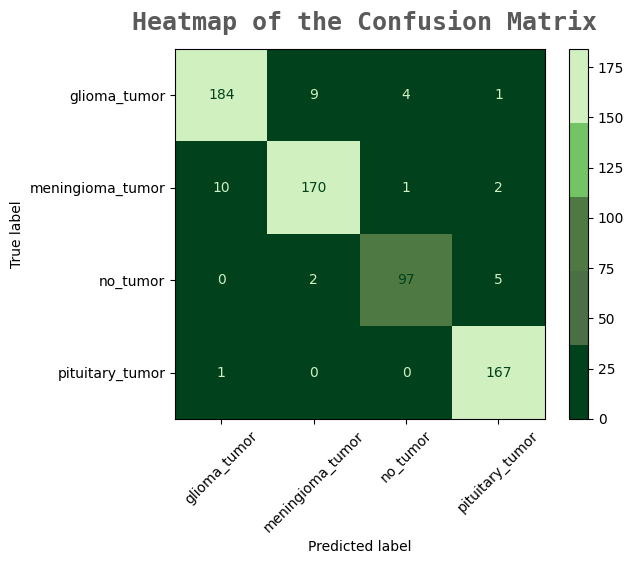

In [23]:
labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

# Define the custom color map
custom_colors = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']
custom_cmap = matplotlib.colors.ListedColormap(custom_colors)

# Calculate confusion matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)

# Create a display object with the custom color map
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])

# Plot the confusion matrix
fig, ax = plt.subplots()
disp.plot(cmap=custom_cmap, ax=ax)

# Set the title and axis labels
fig.text(s='Heatmap of the Confusion Matrix',size=18,fontweight='bold',
             fontname='monospace',color=colors_dark[1],y=0.92,x=0.10,alpha=0.8)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Save the figure
plt.savefig('CM CNN-2.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

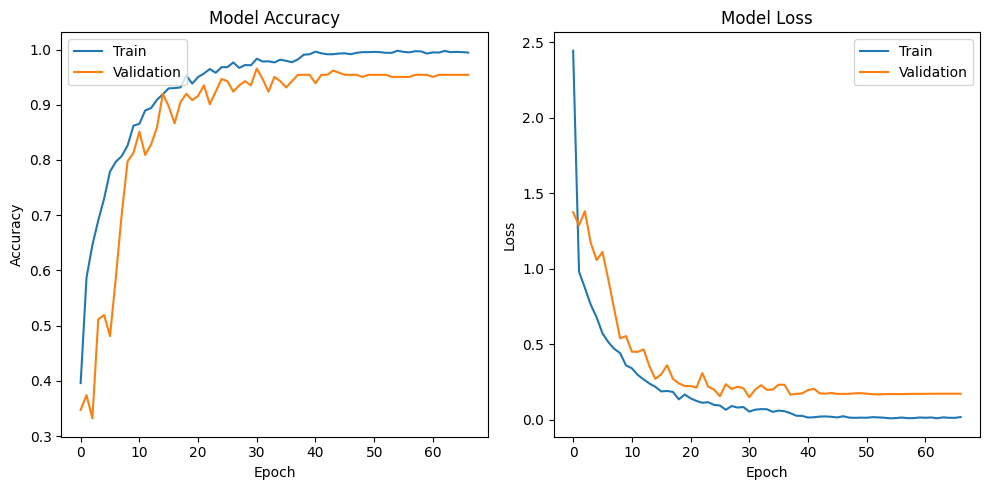

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), facecolor='white')

# Plot training and validation accuracy
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training and validation loss
ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(['Train', 'Validation'], loc='upper right')

# Save the figure
plt.savefig('plot CNN-2.png', dpi=300, bbox_inches='tight')

plt.tight_layout()
plt.show()

21/21 ━━━━━━━━━━━━━━━━━━━━ 7s 335ms/step


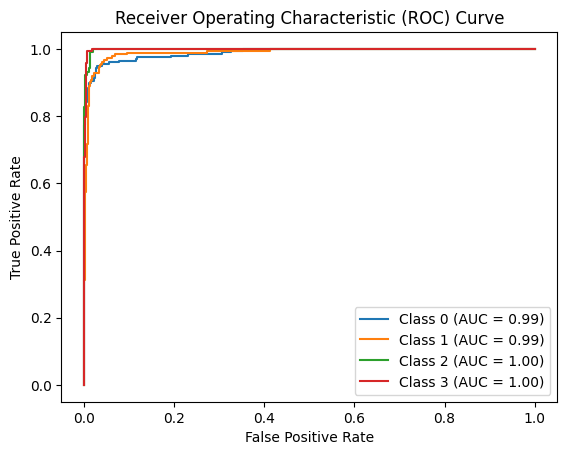

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

# Compute predicted probabilities for each class
y_probs = model.predict(X_test)

# Ensure that the target labels Y_test are in a 2-dimensional format
if len(Y_test.shape) == 1:
    Y_test = np.eye(len(np.unique(Y_test)))[Y_test.astype(int)]

# Compute the ROC curve and AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(Y_test.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_probs[:, i])
    roc_auc[i] = roc_auc_score(Y_test[:, i], y_probs[:, i])

# Plot the ROC curve for each class
plt.figure()
for i in range(Y_test.shape[1]):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Set the title and axis labels
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Save the figure
plt.savefig('ROC CNN-2.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

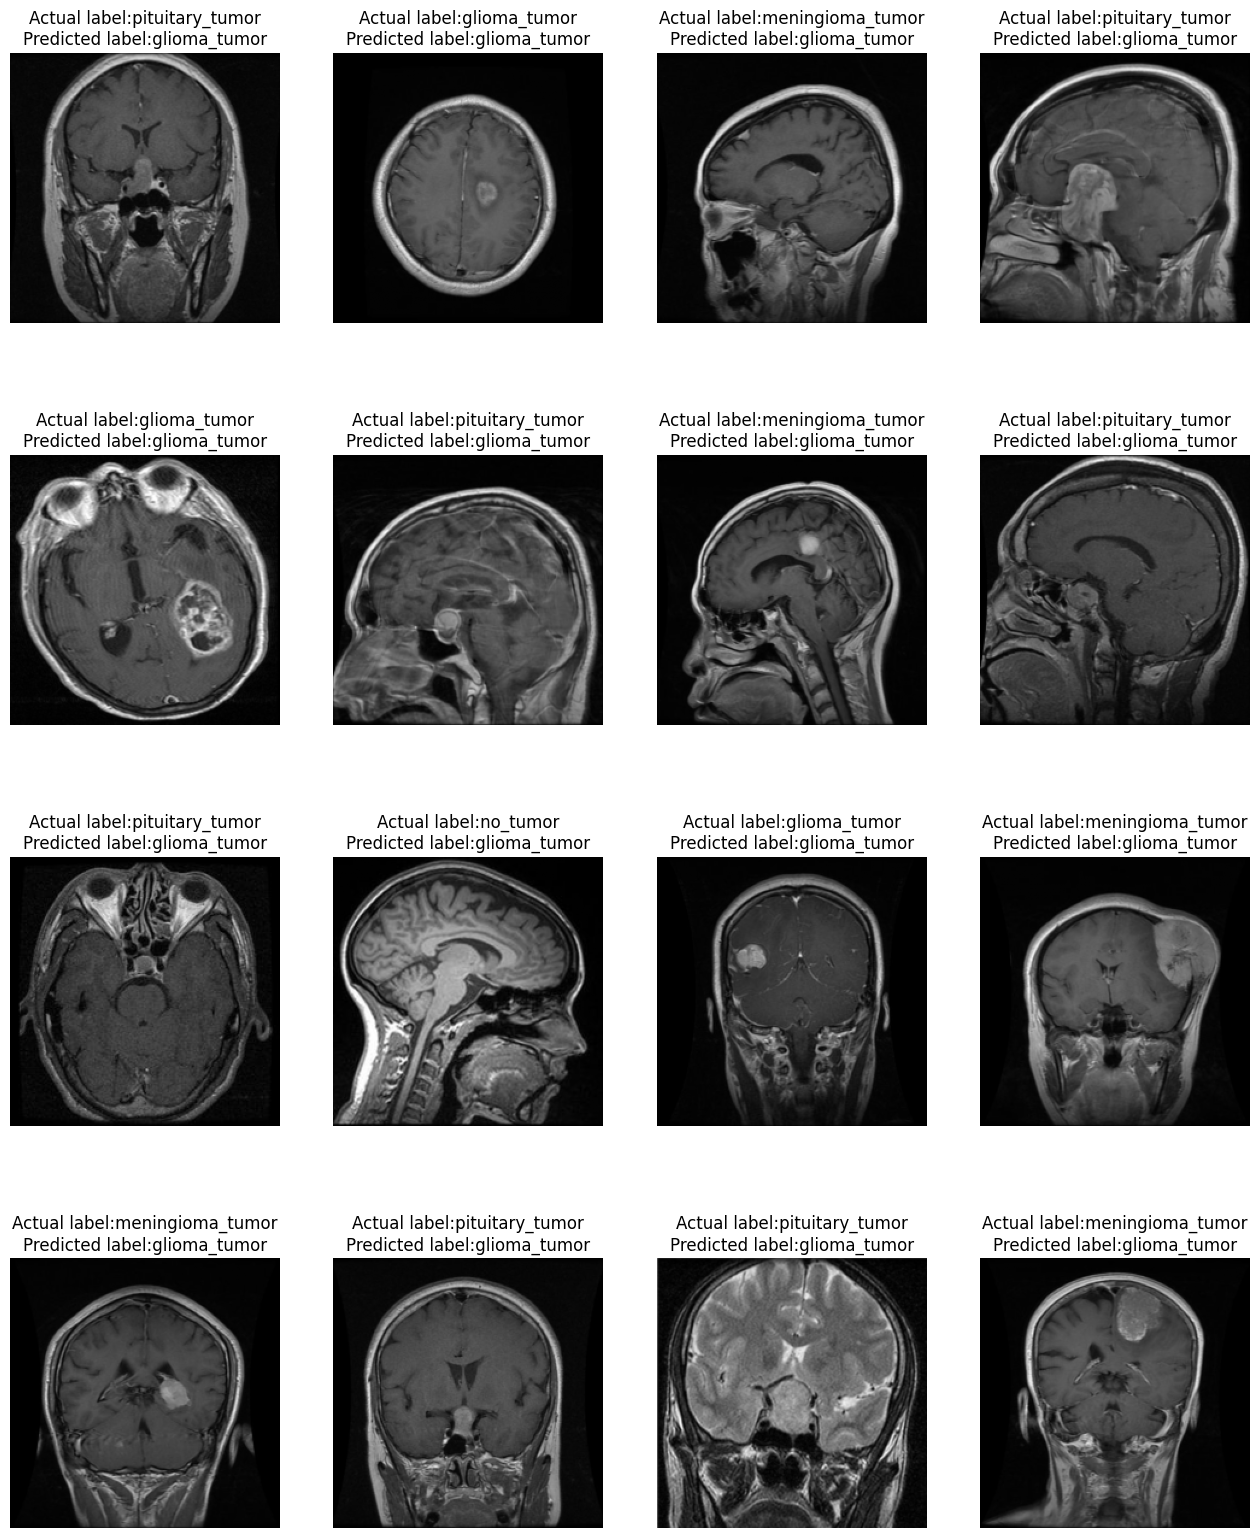

In [26]:
class_labels=['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
plt.figure(figsize=(16,20))

for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i])
    actual_label_idx = np.argmax(Y_test[i])  # Assuming Y_test is one-hot encoded
    predicted_label_idx = np.argmax(y_pred[i])  # Assuming y_pred is one-hot encoded
    plt.title(f"Actual label:{class_labels[actual_label_idx]}\nPredicted label:{class_labels[predicted_label_idx]}")
    plt.axis("off")

# Predict the Images

In [33]:
def predict(img_path):
    import numpy as np
    import matplotlib.pyplot as plt
    from PIL import Image
    
    # Define the class labels
    labels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
    
    plt.figure(figsize=(12, 12))
    plt.style.use('fivethirtyeight')
    
    # Load and preprocess the image
    img = Image.open(img_path)
    resized_img = img.resize((224, 224))
    img = np.asarray(resized_img)
    img = np.expand_dims(img, axis=0)
    img = img / 255
    
    # Make predictions
    predictions = model.predict(img)
    probs = list(predictions[0])
    
    ax1 = plt.subplot(2, 1, 1)
    ax1.imshow(resized_img)
    ax1.axis('off')  # Remove axis for the image subplot
    
    ax2 = plt.subplot(2, 1, 2)
    bars = ax2.barh(labels, probs)
    plt.xlabel('Probability', fontsize=15)
    ax2.bar_label(bars, fmt='%.2f')
    
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


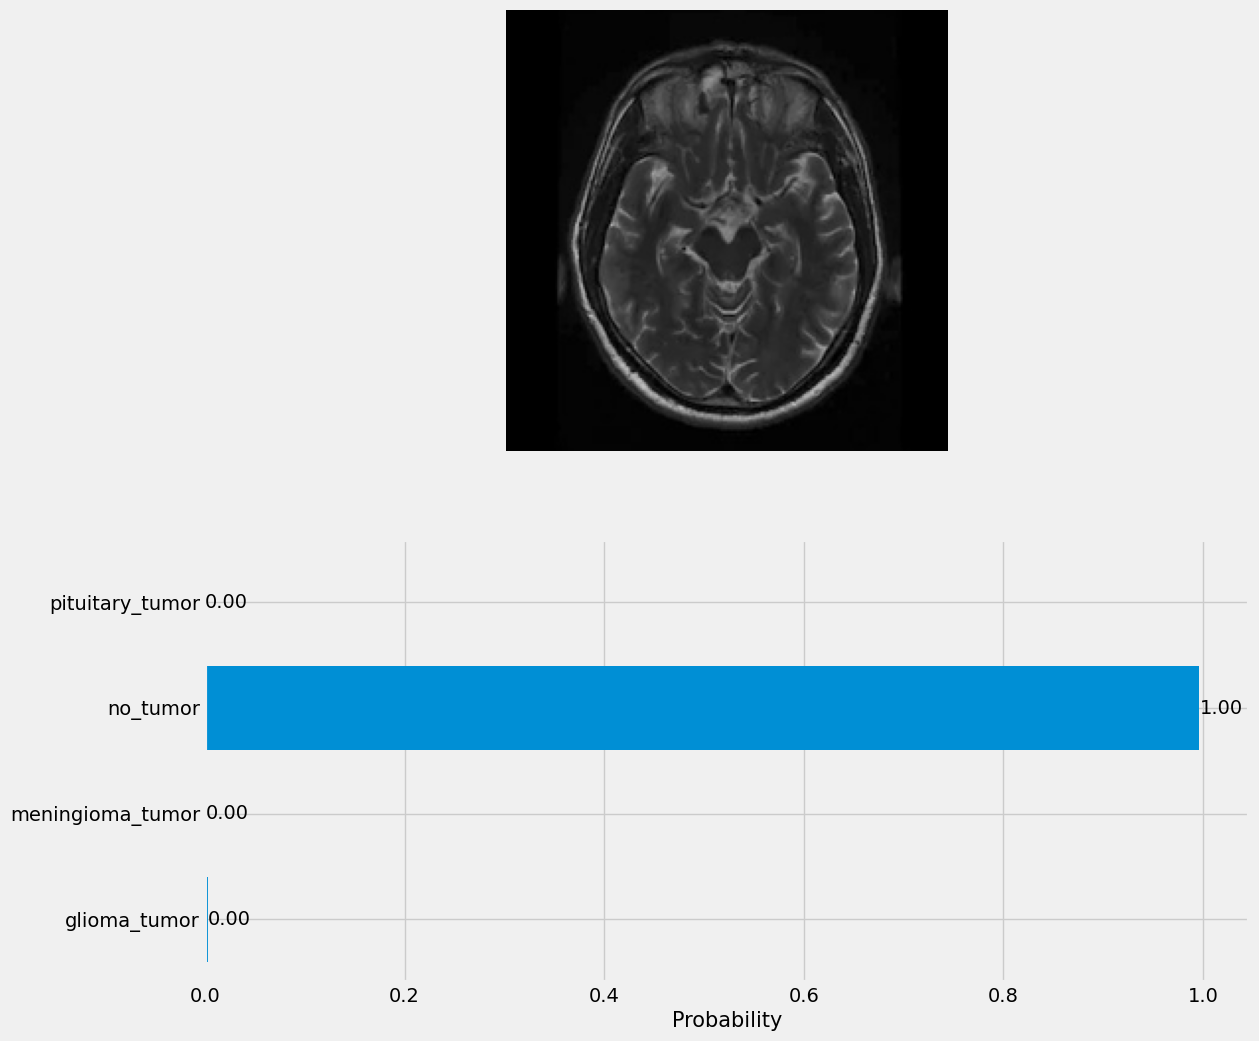

In [34]:
predict('/kaggle/input/brain-tumor-classification-mri/Testing/no_tumor/image(104).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


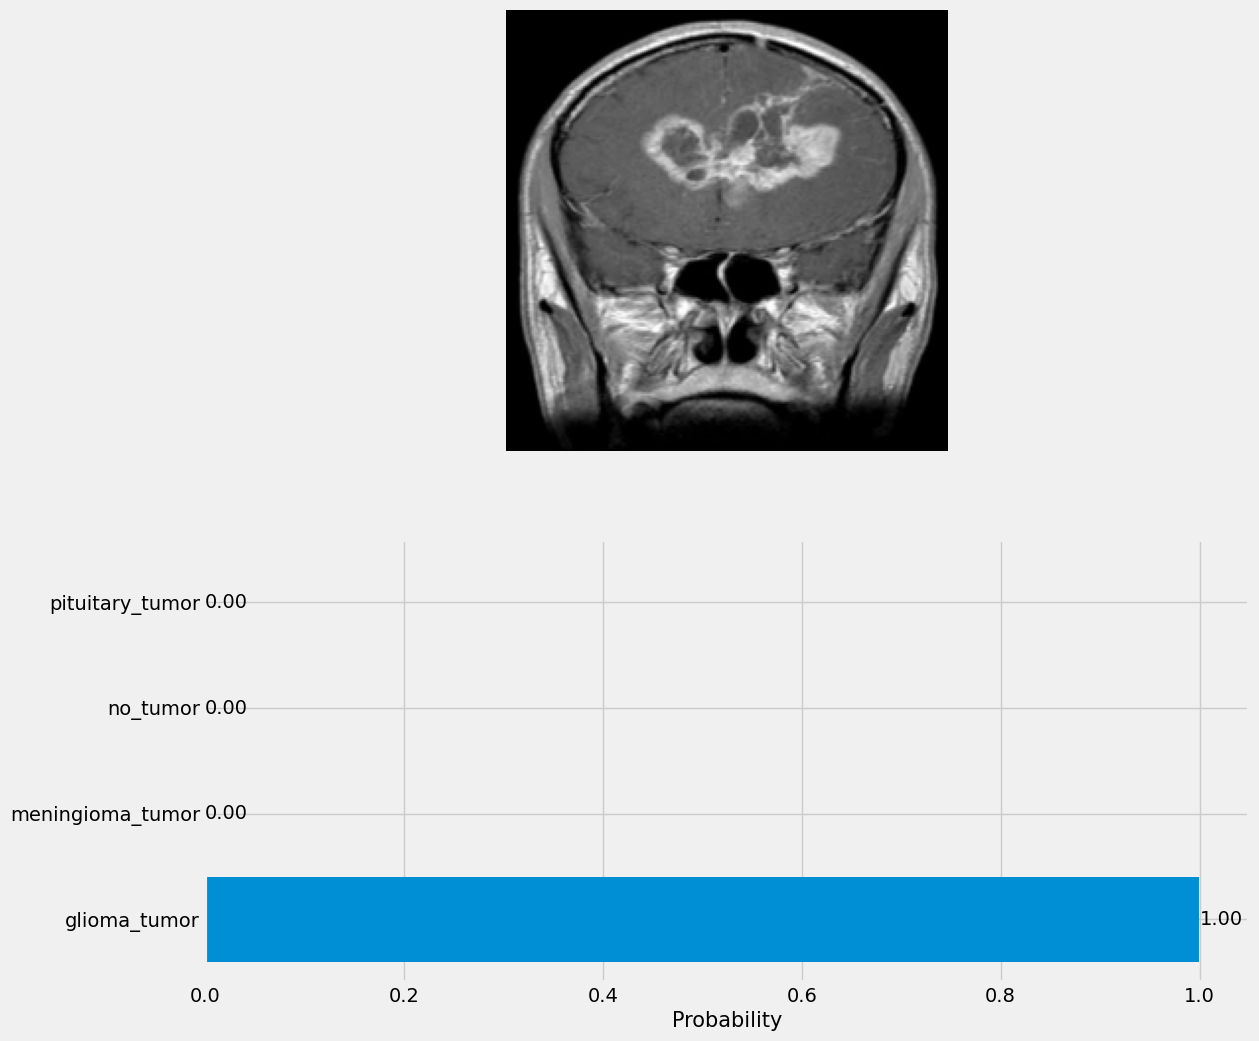

In [35]:
predict('/kaggle/input/brain-tumor-classification-mri/Testing/glioma_tumor/image(1).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


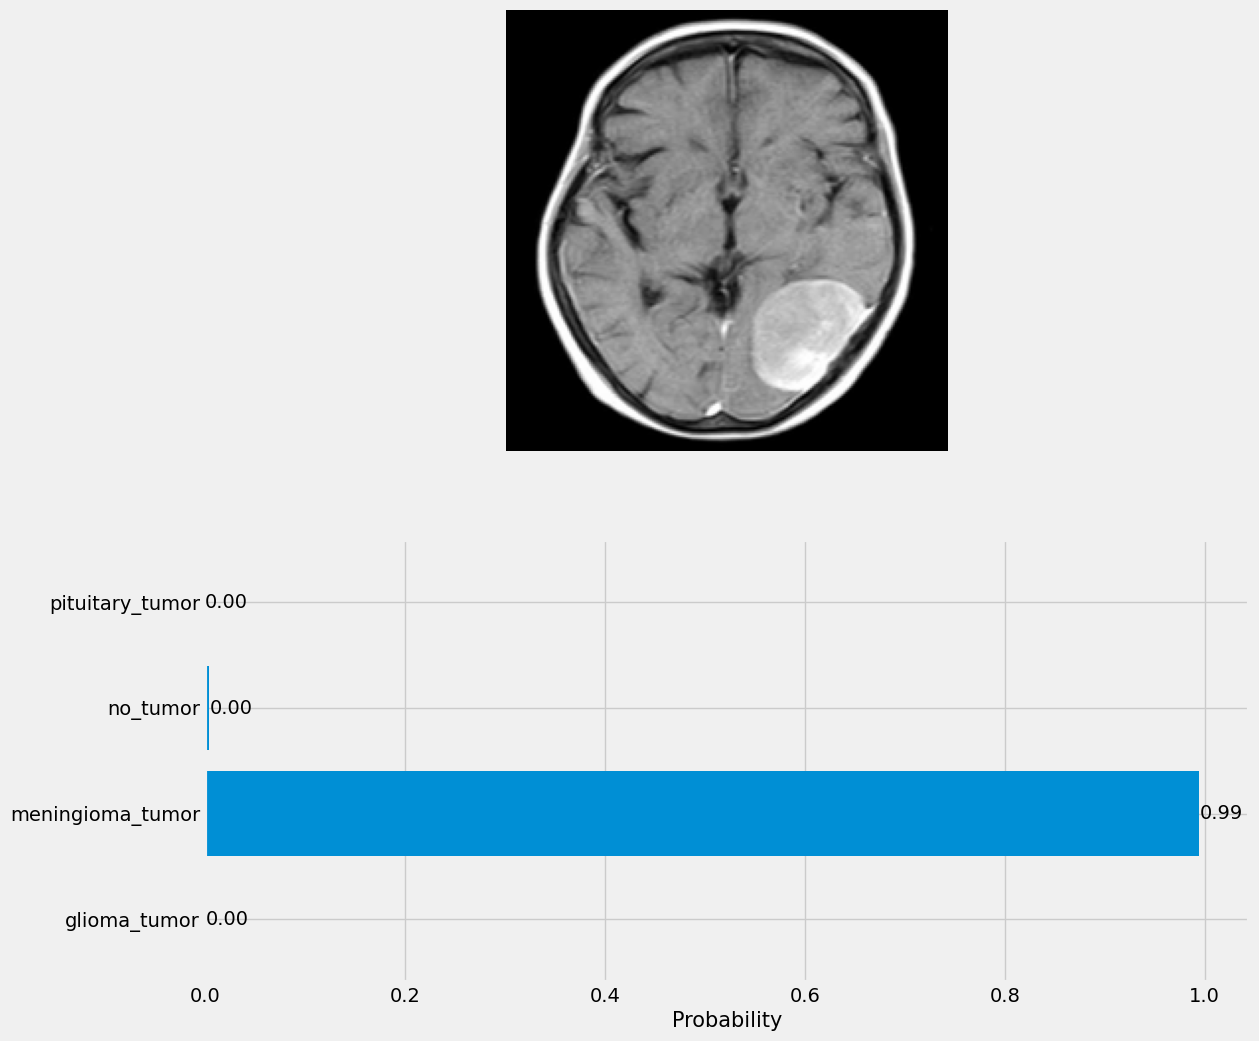

In [36]:
predict('/kaggle/input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(106).jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


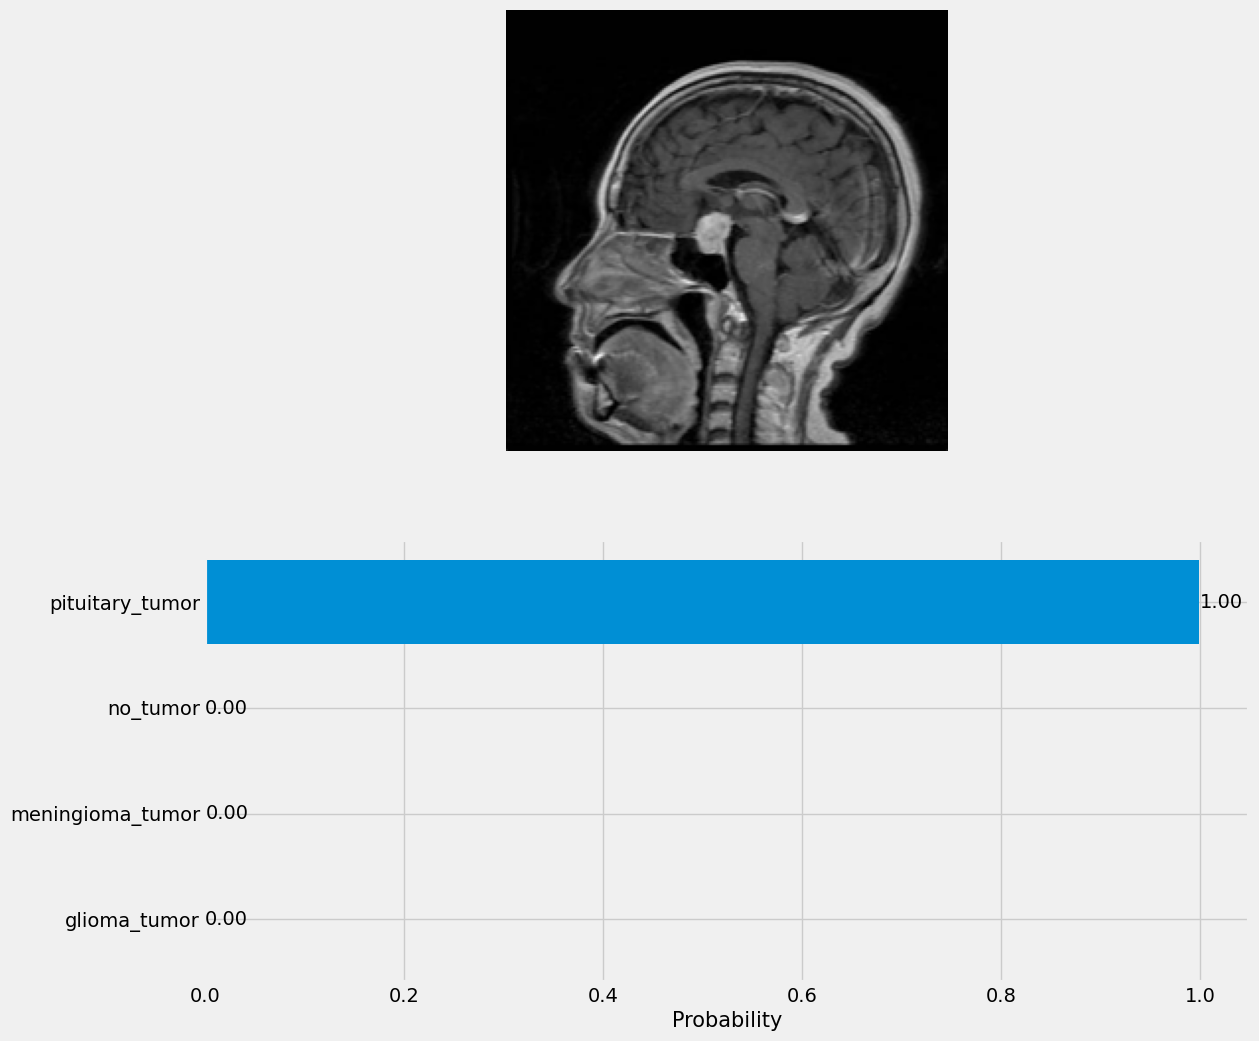

In [37]:
predict('/kaggle/input/brain-tumor-classification-mri/Testing/pituitary_tumor/image(19).jpg')

# --------------------------------------------------